In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [6]:
# Load original datasets
data_10 = pd.read_csv('../../data/dataset/processed_datasets/feature_selection/data_encoded_10_features.csv')
data_20 = pd.read_csv('../../data/dataset/processed_datasets/feature_selection/data_encoded_20_features.csv')
data_37 = pd.read_csv('../../data/dataset/processed_datasets/feature_selection/data_encoded_full_dataset.csv')

In [18]:
# Separate features and target for original datasets
X_10, y_10 = data_10.drop(columns=['HeartDisease_Yes']), data_10['HeartDisease_Yes']
X_20, y_20 = data_20.drop(columns=['HeartDisease_Yes']), data_20['HeartDisease_Yes']
X_37, y_37 = data_37.drop(columns=['HeartDisease_Yes']), data_37['HeartDisease_Yes']

In [19]:
# Original datasets - Split each dataset into training and testing sets
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_10, y_10, test_size=0.2, random_state=42)
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X_20, y_20, test_size=0.2, random_state=42)
X_train_37, X_test_37, y_train_37, y_test_37 = train_test_split(X_37, y_37, test_size=0.2, random_state=42)

In [10]:
# Initialize the kNN classifier with k=5 and train it on each training set
knn_clf_10 = KNeighborsClassifier(n_neighbors=5)
knn_clf_20 = KNeighborsClassifier(n_neighbors=5)
knn_clf_37 = KNeighborsClassifier(n_neighbors=5)

# Training for original datasets
knn_clf_10.fit(X_train_10, y_train_10)
knn_clf_20.fit(X_train_20, y_train_20)
knn_clf_37.fit(X_train_37, y_train_37)

KNeighborsClassifier()

In [20]:
# Predictions for each dataset
y_pred_10 = knn_clf_10.predict(X_test_10)
y_pred_20 = knn_clf_20.predict(X_test_20)
y_pred_37 = knn_clf_37.predict(X_test_37)

In [23]:
# Calculate accuracy, precision, recall, F1-Score for each dataset
accuracy_10 = accuracy_score(y_test_10, y_pred_10)
precision_10 = precision_score(y_test_10, y_pred_10)
recall_10 = recall_score(y_test_10, y_pred_10)
f1_10 = f1_score(y_test_10, y_pred_10)

accuracy_20 = accuracy_score(y_test_20, y_pred_20)
precision_20 = precision_score(y_test_20, y_pred_20)
recall_20 = recall_score(y_test_20, y_pred_20)
f1_20 = f1_score(y_test_20, y_pred_20)

accuracy_37 = accuracy_score(y_test_37, y_pred_37)
precision_37 = precision_score(y_test_37, y_pred_37)
recall_37 = recall_score(y_test_37, y_pred_37)
f1_37 = f1_score(y_test_37, y_pred_37)

In [24]:
# Cross-validation predictions for ROC and AUC calculation
y_scores_10 = cross_val_predict(knn_clf_10, X_train_10, y_train_10, cv=3, method="predict_proba")[:, 1]
fpr_10, tpr_10, _ = roc_curve(y_train_10, y_scores_10)
roc_auc_10 = roc_auc_score(y_train_10, y_scores_10)

y_scores_20 = cross_val_predict(knn_clf_20, X_train_20, y_train_20, cv=3, method="predict_proba")[:, 1]
fpr_20, tpr_20, _ = roc_curve(y_train_20, y_scores_20)
roc_auc_20 = roc_auc_score(y_train_20, y_scores_20)

y_scores_37 = cross_val_predict(knn_clf_37, X_train_37, y_train_37, cv=3, method="predict_proba")[:, 1]
fpr_37, tpr_37, _ = roc_curve(y_train_37, y_scores_37)
roc_auc_37 = roc_auc_score(y_train_37, y_scores_37)

In [25]:
# Print the results for each dataset
print("Results for 10 Features Dataset:")
print(f"Accuracy: {accuracy_10:.2f}")
print(f"Precision: {precision_10:.2f}")
print(f"Recall: {recall_10:.2f}")
print(f"F1-Score: {f1_10:.2f}")
print(f"AUC: {roc_auc_10:.2f}")
print("\n")

print("Results for 20 Features Dataset:")
print(f"Accuracy: {accuracy_20:.2f}")
print(f"Precision: {precision_20:.2f}")
print(f"Recall: {recall_20:.2f}")
print(f"F1-Score: {f1_20:.2f}")
print(f"AUC: {roc_auc_20:.2f}")
print("\n")

print("Results for 37 Features Dataset:")
print(f"Accuracy: {accuracy_37:.2f}")
print(f"Precision: {precision_37:.2f}")
print(f"Recall: {recall_37:.2f}")
print(f"F1-Score: {f1_37:.2f}")
print(f"AUC: {roc_auc_37:.2f}")

Results for 10 Features Dataset:
Accuracy: 0.90
Precision: 0.32
Recall: 0.11
F1-Score: 0.17
AUC: 0.68


Results for 20 Features Dataset:
Accuracy: 0.90
Precision: 0.36
Recall: 0.13
F1-Score: 0.19
AUC: 0.70


Results for 37 Features Dataset:
Accuracy: 0.90
Precision: 0.33
Recall: 0.08
F1-Score: 0.13
AUC: 0.67


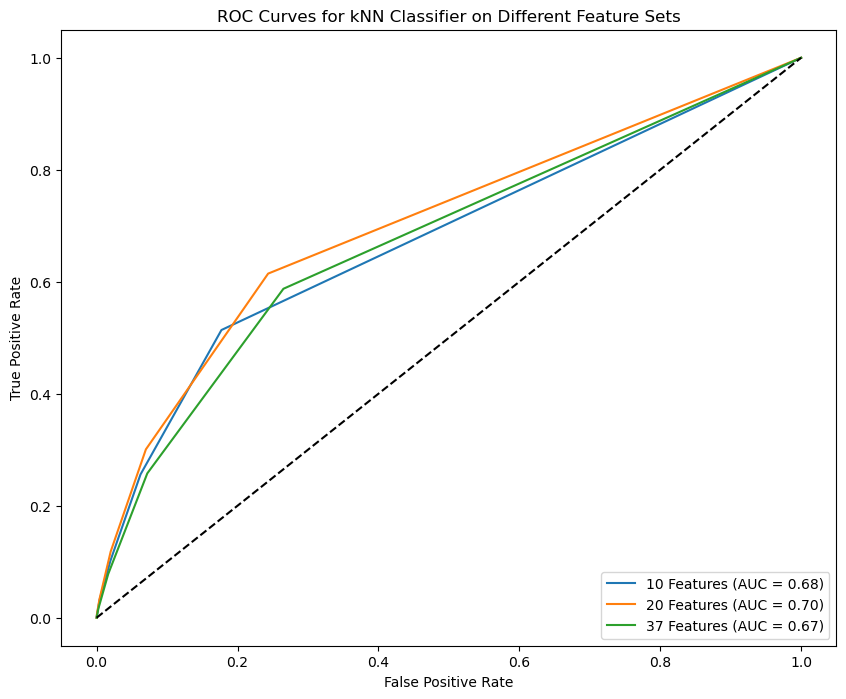

In [26]:
# Plotting the ROC Curves for the datasets (original)
plt.figure(figsize=(10, 8))
plt.plot(fpr_10, tpr_10, label="10 Features (AUC = {:.2f})".format(roc_auc_10))
plt.plot(fpr_20, tpr_20, label="20 Features (AUC = {:.2f})".format(roc_auc_20))
plt.plot(fpr_37, tpr_37, label="37 Features (AUC = {:.2f})".format(roc_auc_37))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for kNN Classifier on Different Feature Sets')
plt.legend(loc="lower right")
plt.show()



In [27]:
# Load undersampled datasets
data_resample_10 = pd.read_csv('../../data/dataset/feature_selection/resample_encoded_10_features.csv')
data_resample_20 = pd.read_csv('../../data/dataset/feature_selection/resample_encoded_20_features.csv')
data_resample_37 = pd.read_csv('../../data/dataset/feature_selection/resample_encoded_37_features.csv')

In [28]:
# Separate features and target for each undersampled dataset
X_resample_10, y_resample_10 = data_resample_10.drop(columns=['HeartDisease_Yes']), data_resample_10['HeartDisease_Yes']
X_resample_20, y_resample_20 = data_resample_20.drop(columns=['HeartDisease_Yes']), data_resample_20['HeartDisease_Yes']
X_resample_37, y_resample_37 = data_resample_37.drop(columns=['HeartDisease_Yes']), data_resample_37['HeartDisease_Yes']

In [29]:
# Split each undersampled dataset into training and testing sets
X_train_resample_10, X_test_resample_10, y_train_resample_10, y_test_resample_10 = train_test_split(X_resample_10, y_resample_10, test_size=0.2, random_state=42)
X_train_resample_20, X_test_resample_20, y_train_resample_20, y_test_resample_20 = train_test_split(X_resample_20, y_resample_20, test_size=0.2, random_state=42)
X_train_resample_37, X_test_resample_37, y_train_resample_37, y_test_resample_37 = train_test_split(X_resample_37, y_resample_37, test_size=0.2, random_state=42)

In [32]:
# Initialize and train kNN classifiers for each undersampled dataset
knn_resample_10 = KNeighborsClassifier(n_neighbors=5)
knn_resample_20 = KNeighborsClassifier(n_neighbors=5)
knn_resample_37 = KNeighborsClassifier(n_neighbors=5)

# training the undersampled datasets
knn_resample_10.fit(X_train_resample_10, y_train_resample_10)
knn_resample_20.fit(X_train_resample_20, y_train_resample_20)
knn_resample_37.fit(X_train_resample_37, y_train_resample_37)

KNeighborsClassifier()

In [33]:
# Predictions for each undersampled dataset
y_pred_resample_10 = knn_resample_10.predict(X_test_resample_10)
y_pred_resample_20 = knn_resample_20.predict(X_test_resample_20)
y_pred_resample_37 = knn_resample_37.predict(X_test_resample_37)


In [38]:
# Calculate accuracy, precision, recall, F1-score, and AUC for each undersampled dataset
metrics = {}
roc_values = {}

for name, y_test, y_pred, X_train, y_train, knn_clf in [
    ("10 Features", y_test_resample_10, y_pred_resample_10, X_train_resample_10, y_train_resample_10, knn_resample_10),
    ("20 Features", y_test_resample_20, y_pred_resample_20, X_train_resample_20, y_train_resample_20, knn_resample_20),
    ("37 Features", y_test_resample_37, y_pred_resample_37, X_train_resample_37, y_train_resample_37, knn_resample_37)
]:
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Cross-validation predictions for ROC and AUC calculation
    y_scores = cross_val_predict(knn_clf, X_train, y_train, cv=3, method="predict_proba")[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_scores)
    auc = roc_auc_score(y_train, y_scores)
    
    # Store the metrics
    metrics[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc
    }

    # Store ROC values for plotting
    roc_values[name] = (fpr, tpr, auc)

# Print the results
for dataset, metric_values in metrics.items():
    print(f"\nResults for {dataset} Dataset (Undersampled):")
    for metric, value in metric_values.items():
        print(f"{metric}: {value:.2f}")




Results for 10 Features Dataset (Undersampled):
Accuracy: 0.69
Precision: 0.68
Recall: 0.71
F1-Score: 0.70
AUC: 0.73

Results for 20 Features Dataset (Undersampled):
Accuracy: 0.72
Precision: 0.71
Recall: 0.74
F1-Score: 0.72
AUC: 0.77

Results for 37 Features Dataset (Undersampled):
Accuracy: 0.69
Precision: 0.69
Recall: 0.70
F1-Score: 0.69
AUC: 0.74


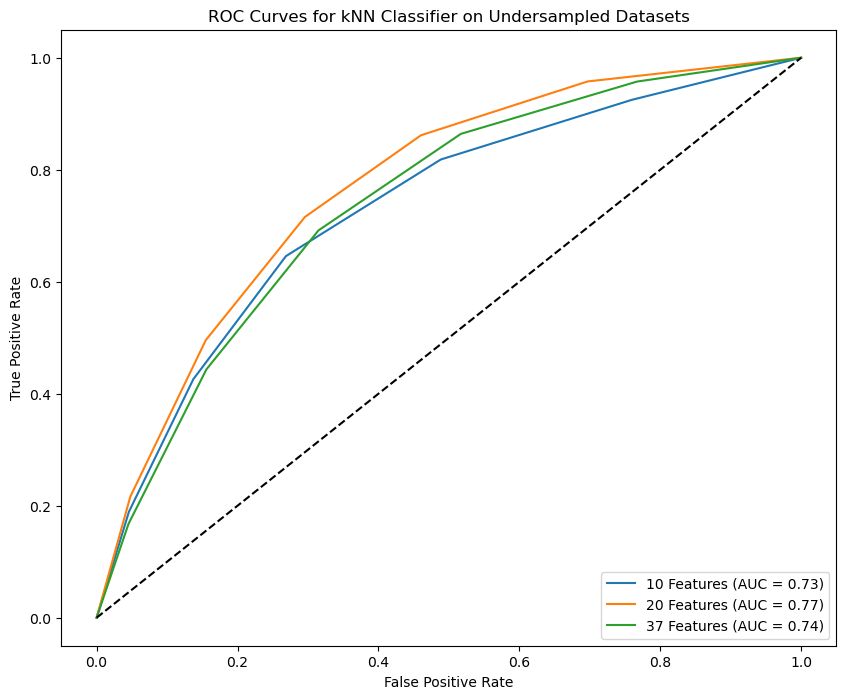

In [39]:
# Plotting the ROC Curves
plt.figure(figsize=(10, 8))
for name, (fpr, tpr, auc) in roc_values.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Plotting the random classifier line
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for a random classifier

# Labels and Title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for kNN Classifier on Undersampled Datasets')
plt.legend(loc="lower right")
plt.show()